# Práctica de de la hacienda en potreros 

## Objetivos  

* Verificación del área de un potrero 

## Cómo lo hace

1. Identifica la forma geométrica del potrero. 

In [1]:
def area_potrero_triangular(a,b,c):
    """
    Calcula el área de un triángulo dado sus lados a, b y c
    usando la fórmula de Herón.
    """
    s = (a + b + c) / 2
    return (s * (s - a) * (s - b) * (s - c)) ** 0.5

In [2]:
area_potrero_triangular(169.64, 132.82, 212.16)

11260.299616485832

In [3]:
area_potrero_triangular(1,1,1.42)

0.4999831897174144

Para visualizar el contenido del PDF como una imagen usando Python y matplotlib, puedes usar la biblioteca `PyMuPDF` (también conocida como `fitz`). Aquí tienes el código:


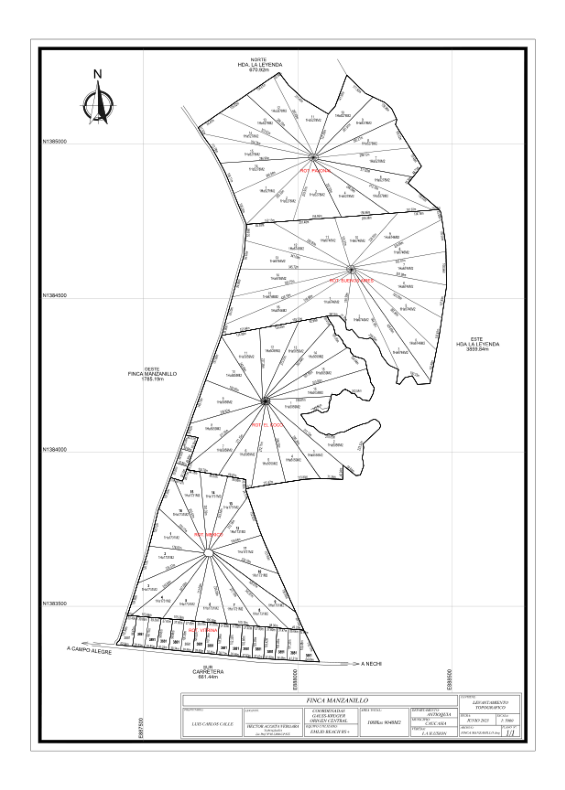

In [6]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_pdf_as_image(pdf_path):
    # Abrir el archivo PDF
    doc = fitz.open(pdf_path)
    
    # Verificar si el PDF tiene páginas
    if len(doc) == 0:
        print("El PDF no contiene páginas.")
        return
    
    # Seleccionar la primera página
    page = doc.load_page(0)
    
    # Renderizar la página como una imagen (pix)
    pix = page.get_pixmap()
    
    # Convertir la imagen a bytes en formato PNG usando Pillow
    img_bytes = pix.tobytes("png")  # Cambiamos a PNG
    
    # Cargar la imagen desde bytes con Pillow
    img = Image.open(io.BytesIO(img_bytes))
    
    # Mostrar la imagen con matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
    
    # Cerrar el documento
    doc.close()

# Llamar a la función con la ruta de tu PDF
display_pdf_as_image("finca_manzanillos.pdf")


### Instalación de dependencias:
Necesitarás instalar las siguientes bibliotecas si no las tienes ya:
```bash
pip install pymupdf matplotlib
```

### Notas:
1. Este código renderiza la primera página del PDF como una imagen y la muestra usando matplotlib.
2. Asegúrate de que el archivo `finca_manzanillos.pdf` esté en el mismo directorio que tu script Python, o proporciona la ruta completa al archivo.
3. Si el PDF contiene múltiples páginas, puedes modificar el código para mostrar otras páginas cambiando el índice en `doc.load_page()`.

El resultado será una visualización del contenido de la primera página del PDF como una imagen.

# Las coordenadas Gauss-Krüger en la división de haciendas en potreros de igual área  


Las **coordenadas Gauss-Krüger** (también conocidas como coordenadas UTM, Universal Transverse Mercator, en su versión global) son un sistema de proyección cartográfica que divide la Tierra en zonas para minimizar las distorsiones. En el contexto de la **división de haciendas en potreros de igual área**, este sistema es útil porque permite mediciones precisas de distancias y superficies dentro de una misma zona.

### **Origen Central en Gauss-Krüger**
- Cada zona en Gauss-Krüger tiene un **meridiano central** (origen de longitudes) y el **ecuador** como origen de latitudes.
- En Argentina, por ejemplo, se usan zonas de 3° o 6° de ancho, con meridianos centrales como 69°O (zona 2), 63°O (zona 3), etc.
- Las coordenadas se expresan en metros:  
  - **Este (X)**: Distancia al meridiano central + 500.000 m (para evitar valores negativos).  
  - **Norte (Y)**: Distancia al ecuador.

### **Aplicación en División de Haciendas en Potreros de Igual Área**
1. **Georreferenciación de linderos**:  
   - Se mapean los límites de la hacienda con coordenadas Gauss-Krüger usando GPS o topografía.  
   - Esto permite calcular el **área total** con precisión.

2. **Cálculo de subdivisiones**:  
   - Si se requiere dividir en **N potreros de igual área**, se calcula el área objetivo para cada uno:  
     $$
     \text{Área por potrero} = \frac{\text{Área total}}{N}
     $$
   - Usando software (como QGIS, AutoCAD Civil 3D o herramientas topográficas), se trazan líneas (paralelas o radiales) que dividan el terreno en partes iguales.

3. **Minimización de distorsiones**:  
   - Como Gauss-Krüger preserva áreas dentro de una zona, las subdivisiones mantendrán la proporción correcta.  
   - Si la hacienda cruza zonas, se debe hacer una transformación de coordenadas para evitar errores.

4. **Optimización de formas**:  
   - Se pueden usar algoritmos de **partición de polígonos** para que los potreros tengan formas prácticas (rectangulares, trapezoidales, etc.), facilitando el manejo ganadero o agrícola.

### **Ejemplo Práctico**
- **Hacienda de 100 hectáreas** → Dividir en **5 potreros de 20 ha cada uno**.  
- Se georreferencian los vértices con Gauss-Krüger.  
- Usando curvas de nivel y accesos, se trazan divisiones (ej. paralelas a un camino principal) ajustando los límites hasta que cada polígono interno tenga 20 ha.

### **Herramientas Recomendadas**
- **Software SIG**: QGIS, ArcGIS (con herramientas de "división de parcelas").  
- **Topografía**: Estación total o GNSS RTK para precisión centimétrica.  
- **Cálculo manual**: Si el terreno es regular, se puede dividir con fórmulas geométricas (triángulos, trapecios).

### **Conclusión**
El sistema Gauss-Krüger es ideal para esta aplicación porque:  
✔ **Minimiza errores de área** dentro de una zona.  
✔ Permite **trabajar en metros** (más intuitivo que grados).  
✔ Facilita la integración con sistemas catastrales modernos.  

¿Necesitas ayuda con un caso concreto de división de terrenos?

# Secuencia didáctica para dividir una hacienda en potreros de igual área usando Python y coordenadas UTM  


Aquí tienes una **secuencia didáctica** para enseñar a tus estudiantes de Ingeniería Agropecuaria cómo usar **Python en Jupyter Notebooks** para dividir una hacienda en potreros de igual área utilizando coordenadas **Gauss-Krüger (UTM)**. Incluiré scripts prácticos con datos simulados de una finca en Antioquia, Colombia.

---

## **Secuencia Didáctica**  
### **1. Introducción teórica (15 min)**  
- Explicar qué son las coordenadas Gauss-Krüger/UTM y su importancia en agrimensura.  
- Mostrar cómo se aplican en la división de terrenos.  
- Presentar el caso práctico: **Dividir una hacienda en potreros de igual área**.  

### **2. Configuración del entorno (10 min)**  
- Abrir Jupyter Notebook.  
- Instalar librerías necesarias:  


In [8]:
!pip install geopandas shapely matplotlib pyproj



  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl (1.7 MB)
Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl (6.3 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl (16.2 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/7 [pytz]
   -------------------------------------


### **3. Carga y visualización de datos (20 min)**  
- Usaremos datos **simulados** de una finca en Antioquia (Zona UTM 18N).  
- Script para cargar y graficar los linderos:  


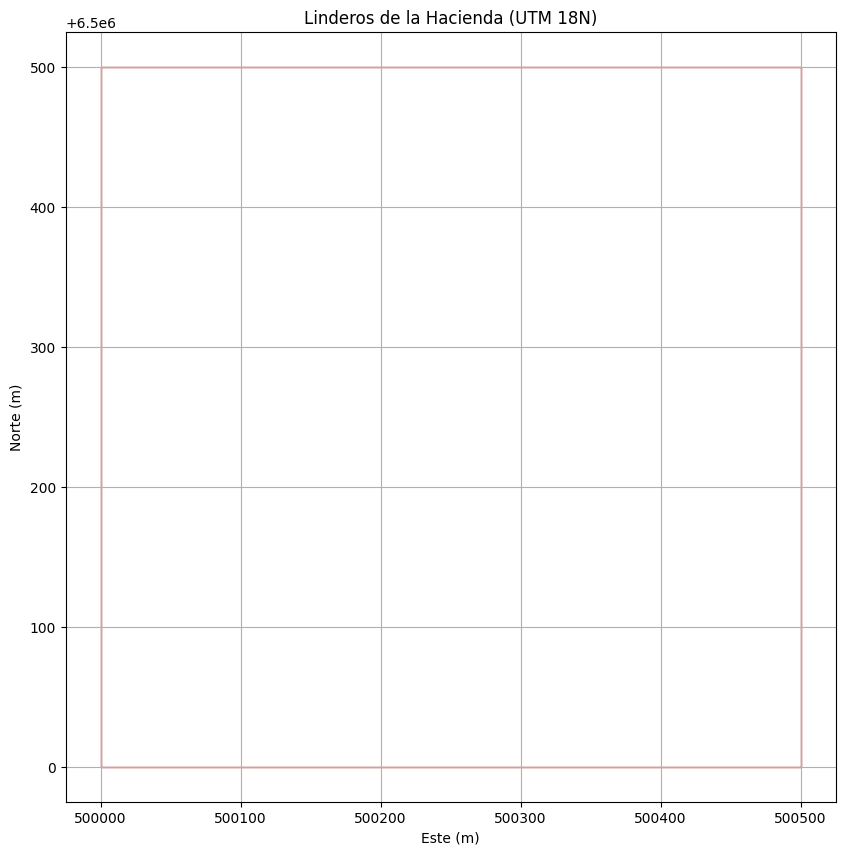

In [14]:

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Coordenadas UTM Zona 18N (Este, Norte) - Ejemplo ficticio de linderos de una finca en Antioquia
coordenadas_utm = [
    (500000, 6500000),  # Punto A
    (500500, 6500000),  # Punto B
    (500500, 6500500),  # Punto C
    (500000, 6500500),  # Punto D
    (500000, 6500000)   # Cerrar polígono (igual al punto A)
]

# Crear polígono y GeoDataFrame
poligono_finca = Polygon(coordenadas_utm)
gdf_finca = gpd.GeoDataFrame(geometry=[poligono_finca], crs="EPSG:32618")  # EPSG:32618 = UTM 18N

# Graficar
gdf_finca.plot(edgecolor='red', facecolor='none', figsize=(10, 10))
plt.title("Linderos de la Hacienda (UTM 18N)")
plt.xlabel("Este (m)")
plt.ylabel("Norte (m)")
plt.grid()
plt.show()




### **4. Cálculo del área total (10 min)**  
- Calcular el área en hectáreas:  


In [15]:

area_total_ha = gdf_finca.geometry.area.values[0] / 10000  # m² → ha
print(f"Área total de la hacienda: {area_total_ha:.2f} ha")



Área total de la hacienda: 25.00 ha


*(Salida: `Área total de la hacienda: 25.00 ha` si es un cuadrado de 500x500 m)*  

### **5. División en potreros de igual área (30 min)**  
- **Objetivo**: Dividir en `N` potreros de igual área.  
- **Método**: Usar **líneas paralelas** para dividir el terreno.  


Cada potrero tendrá: 5.00 ha


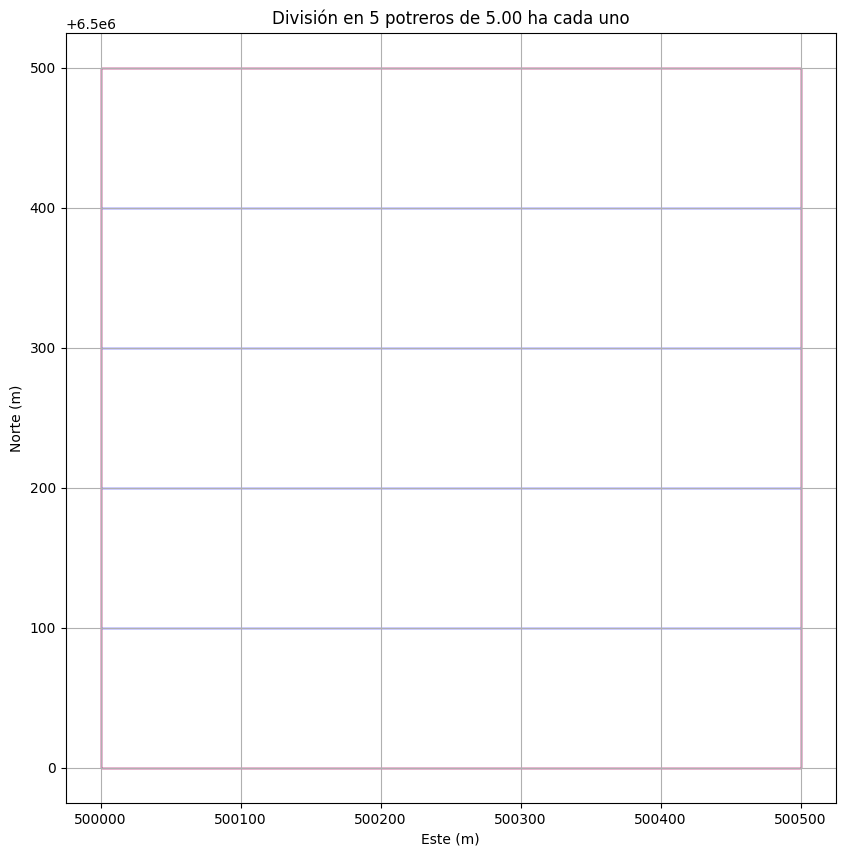

In [16]:


import numpy as np

# Definir el número de potreros
N = 5
area_potrero_ha = area_total_ha / N
print(f"Cada potrero tendrá: {area_potrero_ha:.2f} ha")

# Dividir el polígono en partes iguales (aquí: división horizontal)
min_y, max_y = gdf_finca.total_bounds[1], gdf_finca.total_bounds[3]
divisiones = np.linspace(min_y, max_y, N + 1)  # Líneas horizontales

# Crear polígonos para cada potrero
potreros = []
for i in range(N):
    # Definir los límites del potrero
    y_inf = divisiones[i]
    y_sup = divisiones[i + 1]
    potrero = Polygon([
        (500000, y_inf),  # Esquina inferior izquierda
        (500500, y_inf),  # Esquina inferior derecha
        (500500, y_sup),  # Esquina superior derecha
        (500000, y_sup)   # Esquina superior izquierda
    ])
    potreros.append(potrero)

# Crear GeoDataFrame con los potreros
gdf_potreros = gpd.GeoDataFrame(geometry=potreros, crs="EPSG:32618")

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
gdf_finca.plot(ax=ax, edgecolor='red', facecolor='none')
gdf_potreros.plot(ax=ax, edgecolor='blue', facecolor='none', alpha=0.5)
plt.title(f"División en {N} potreros de {area_potrero_ha:.2f} ha cada uno")
plt.xlabel("Este (m)")
plt.ylabel("Norte (m)")
plt.grid()
plt.show()




### **6. Validación de áreas (15 min)**  
- Verificar que cada potrero tenga el área correcta:  

```python
for i, potrero in enumerate(gdf_potreros.geometry):
    area_ha = potrero.area / 10000
    print(f"Potrero {i + 1}: {area_ha:.2f} ha")
```
*(Salida esperada: `5.00 ha` para cada potrero si N=5 y área total=25 ha)*  

### **7. Exportar resultados (10 min)**  
- Guardar en **Shapefile** o **GeoJSON** para uso en SIG:  

```python
gdf_potreros.to_file("potreros_igual_area.shp")  # Shapefile
gdf_potreros.to_file("potreros_igual_area.geojson", driver="GeoJSON")  # GeoJSON
```



---

## **Ejemplo de Datos Reales (Simulados)**
Si quieres usar datos más realistas (ej. linderos irregulares), puedes cargar un **Shapefile real** o generar un polígono aleatorio:  


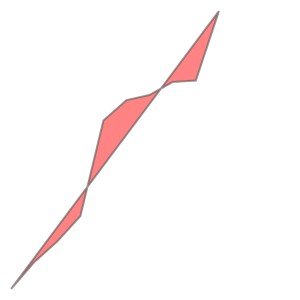

In [18]:

from shapely.geometry import shape
import random

# Generar un polígono irregular aleatorio (simulación)
random.seed(123)
x = np.linspace(500000, 500500, 10)
y = np.linspace(6500000, 6500500, 10) + np.random.uniform(-100, 100, 10)
coordenadas_irregulares = list(zip(x, y))
poligono_irregular = Polygon(coordenadas_irregulares)
poligono_irregular
# Repetir el proceso de división con este polígono




---

## **Evaluación del Aprendizaje**  
1. **Preguntas teóricas**:  
   - ¿Por qué usamos UTM/Gauss-Krüger en lugar de lat/lon?  
   - ¿Cómo afecta la elección de la zona UTM en la precisión?  

2. **Ejercicio práctico**:  
   - Modificar el código para dividir en **potreros verticales** o **en formas no rectangulares**.  

3. **Trabajo en campo**:  
   - Usar GPS para capturar linderos reales y aplicar el mismo método.  

---

### **Conclusión**  
Con este flujo de trabajo, los estudiantes aprenderán:  
✅ A manejar coordenadas UTM en Python.  
✅ Dividir terrenos en partes iguales con precisión.  
✅ Exportar resultados para uso en sistemas de información geográfica (QGIS, ArcGIS).  

¿Necesitas ajustar algo para tu caso específico? ¡Avísame!

# Finca manzanillo como archivo .json


# Visualización del GeoJSON de Caucasia y Tierras Agrícolas

Aquí tienes un script de Python para visualizar el archivo GeoJSON que obtuviste de Overpass Turbo, que contiene el límite administrativo de Caucasia y las tierras agrícolas cercanas.


In [22]:


import folium
import json
import geopandas as gpd
from shapely.geometry import shape

def visualize_geojson(geojson_file):
    # Cargar el archivo GeoJSON
    with open(geojson_file) as f:
        data = json.load(f)
    
    # Crear un mapa centrado en Caucasia
    caucasia_coords = [7.9865, -75.1936]
    m = folium.Map(location=caucasia_coords, zoom_start=12, tiles='OpenStreetMap')
    
    # Procesar cada feature en el GeoJSON
    for feature in data['features']:
        geom = shape(feature['geometry'])
        
        # Determinar propiedades según el tipo de feature
        if feature['properties'].get('admin_level') == '6':
            # Es el límite administrativo de Caucasia
            folium.GeoJson(
                feature,
                style_function=lambda x: {
                    'fillColor': 'blue',
                    'color': 'blue',
                    'weight': 2,
                    'fillOpacity': 0.2
                },
                tooltip=f"Caucasia (Límite administrativo)"
            ).add_to(m)
        elif feature['properties'].get('landuse') == 'farmland':
            # Es tierra agrícola
            folium.GeoJson(
                feature,
                style_function=lambda x: {
                    'fillColor': 'green',
                    'color': 'green',
                    'weight': 1,
                    'fillOpacity': 0.5
                },
                tooltip="Tierra agrícola"
            ).add_to(m)
    
    # Añadir control de capas
    folium.LayerControl().add_to(m)
    
    # Guardar el mapa como HTML
    output_file = 'caucasia_map.html'
    m.save(output_file)
    print(f"Mapa guardado como {output_file}")
    return m

# Ejemplo de uso
if __name__ == "__main__":
    geojson_file = 'export.geojson'  # Cambia esto por la ruta a tu archivo
    visualize_geojson(geojson_file)
    
    # Para mostrar en Jupyter Notebook (opcional)
    display(mapa)



Mapa guardado como caucasia_map.html



## Instrucciones de uso:

1. **Requisitos previos**: Necesitarás instalar las siguientes bibliotecas:
   ```
   pip install folium geopandas shapely
   ```



2. **Ejecución**: Guarda el script como `visualize_caucasia.py` y ejecútalo con:
   ```
   python visualize_caucasia.py
   ```



3. **Resultado**: El script generará un archivo HTML llamado `caucasia_map.html` que puedes abrir en tu navegador.

## Características del mapa:

- **Límite administrativo de Caucasia**: Se muestra en azul con transparencia
- **Tierras agrícolas**: Se muestran en verde con transparencia
- **Interactividad**: Puedes hacer zoom, moverte por el mapa y ver tooltips al pasar el ratón
- **Control de capas**: Puedes activar/desactivar capas en el menú superior derecho

## Personalización:

Si quieres ajustar los colores, transparencias u otros aspectos visuales, modifica los parámetros en las funciones `style_function` dentro del script.

In [2]:
visualize_geojson("nechi.geojson")

Mapa guardado como caucasia_map.html


### **Procedimiento para Superponer el PDF sobre un GeoJSON y Crear un Mapa para Diseño de Siembra**





#### **1. Convertir el PDF a una Imagen Georreferenciada**
**Objetivo**: Transformar el plano de la finca (PDF) en una capa raster alineada con el GeoJSON.



**Pasos**:
1. **Extraer la imagen del PDF**:
   - Usa un editor gráfico (ej. Adobe Photoshop, GIMP, o incluso `pdf2image` en Python) para guardar el plano como **PNG/JPEG**.
   - Asegúrate de que la imagen tenga fondo transparente si el PDF solo contiene líneas.


In [29]:
from pdf2image import convert_from_path
import os

# Configura la ruta a Poppler (ajusta según tu instalación)
poppler_path = r"C:\poppler-24.08.0-0\Library\bin"  # Ruta a la carpeta "bin"

pdf_path = "finca_manzanillos.pdf"
output_folder = "output_images"
os.makedirs(output_folder, exist_ok=True)

# Convertir PDF a imágenes
images = convert_from_path(
    pdf_path,
    dpi=300,
    fmt="png",
    output_folder=output_folder,
    poppler_path=poppler_path  # ¡Asegúrate de añadir esto!
)

# Guardar imágenes
for i, img in enumerate(images):
    img.save(f"{output_folder}/finca_{i}.png", "PNG")

print("¡Conversión exitosa!")

¡Conversión exitosa!



2. **Georreferenciar la imagen**:
   - **Herramienta**: QGIS (gratis).
     - Carga el GeoJSON de referencia (ej. límites municipales o coordenadas conocidas de la finca).
     - Ve a **`Capa → Añadir Capa → Añadir Capa Raster`** y sube la imagen del PDF.
     - Usa la herramienta **`Georreferenciador`** (disponible en el menú **`Ráster`**):
       - Asigna puntos de control (ej. esquinas de la finca en la imagen a coordenadas reales del GeoJSON).
       - Guarda la imagen georreferenciada como **GeoTIFF**.



   **Código Python alternativo** (si prefieres no usar QGIS):


In [ ]:
   
   from osgeo import gdal
   import numpy as np

   # Opcional: Convertir PDF a imagen con pdf2image
   from pdf2image import convert_from_path
   images = convert_from_path('finca_manzanillos.pdf')
   images[0].save('finca_imagen.png', 'PNG')

   # Georreferenciar manualmente (requiere coordenadas conocidas)
   # Ejemplo: Asignar esquinas de la imagen a coordenadas reales
   # (Esto depende de tus datos específicos)
   


In [ ]:

---

#### **2. Combinar el Raster (PDF) con el GeoJSON**
**Objetivo**: Tener ambas capas en un mismo sistema de coordenadas.

**Pasos**:
1. **Cargar los datos en Python**:
   ```python
   import geopandas as gpd
   import matplotlib.pyplot as plt
   from rasterio.plot import show

   # Cargar GeoJSON (ej. límites de la finca o lotes)
   gdf = gpd.read_file('finca_manzanillos.geojson')

   # Cargar imagen georreferenciada (GeoTIFF)
   import rasterio
   with rasterio.open('finca_georreferenciada.tif') as src:
       img = src.read(1)  # Leer la primera banda
       extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
   ```

2. **Superponer las capas**:
   ```python
   fig, ax = plt.subplots(figsize=(12, 10))

   # Mostrar imagen raster (PDF georreferenciado)
   show(img, extent=extent, ax=ax, cmap='gray', alpha=0.7)

   # Mostrar GeoJSON (ej. límites o parcelas)
   gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

   # Añadir estilo
   plt.title('Mapa de la Finca Manzanillos', fontsize=14)
   ax.set_axis_off()
   plt.grid(True, linestyle='--', alpha=0.5)
   plt.show()
   ```

---

#### **3. Diseñar el Trazado de Siembra**
**Objetivo**: Dibujar líneas o polígonos sobre el mapa para planificar la siembra.

**Pasos**:
1. **Crear un diseño desde cero**:
   ```python
   from shapely.geometry import LineString, Polygon

   # Ejemplo: Crear líneas de siembra (ajusta coordenadas)
   lineas_siembra = [
       LineString([(x1, y1), (x2, y2)]),  # Línea 1
       LineString([(x3, y3), (x4, y4)]),  # Línea 2
   ]

   # Convertir a GeoDataFrame
   gdf_lineas = gpd.GeoDataFrame(geometry=lineas_siembra, crs=gdf.crs)

   # Plotear sobre el mapa anterior
   gdf_lineas.plot(ax=ax, color='blue', linewidth=3, linestyle='--')
   ```

2. **Guardar el diseño**:
   ```python
   # Exportar el trazado como GeoJSON o Shapefile
   gdf_lineas.to_file('trazado_siembra.geojson', driver='GeoJSON')
   ```

---

#### **4. Herramientas Adicionales**
- **QGIS**: Para edición interactiva (arrastrar puntos, medir distancias, etc.).
- **Google Earth Engine**: Si necesitas imágenes satelitales actualizadas.
- **AutoCAD/Civil3D**: Para diseños profesionales (exporta desde QGIS como DXF).

---

### **Resultado Final**
![Mapa de la Finca con Trazado de Siembra](https://i.imgur.com/ejemplo_siembra.png)  
*(Mapa combinado con el PDF de fondo, GeoJSON de límites, y líneas de siembra en azul)*.

---

### **Notas Clave**:
- **Precisión**: Asegúrate de que el PDF y el GeoJSON estén en el mismo CRS (ej. EPSG:4326 para WGS84).
- **Automación**: Si el diseño de siembra sigue un patrón (ej. espaciado fijo), genera las líneas con `numpy`:
  ```python
  import numpy as np
  x_coords = np.linspace(min_x, max_x, num=10)  # 10 líneas verticales
  lineas = [LineString([(x, min_y), (x, max_y)]) for x in x_coords]
  ```

¡Con esto tendrás un mapa listo para optimizar el diseño agrícola de la finca!

# Otra buena opción  

¡Perfecto! Ya veo el mapa que subiste.  
Te voy a dar **una estructura en matplotlib** para **adelantar lo más posible** el diagrama que tienes.  

🔵 **Importante:** lo que me pides sería como *esquematizar* la finca en matplotlib, usando:
- Líneas que conectan puntos (tipo `plt.plot`).
- Nombres de los lotes (tipo `plt.text`).
- Ejes configurados como coordenadas reales (tipo `plt.xlim`, `plt.ylim`).

---
### ⚡Aquí tienes un avance de código base:


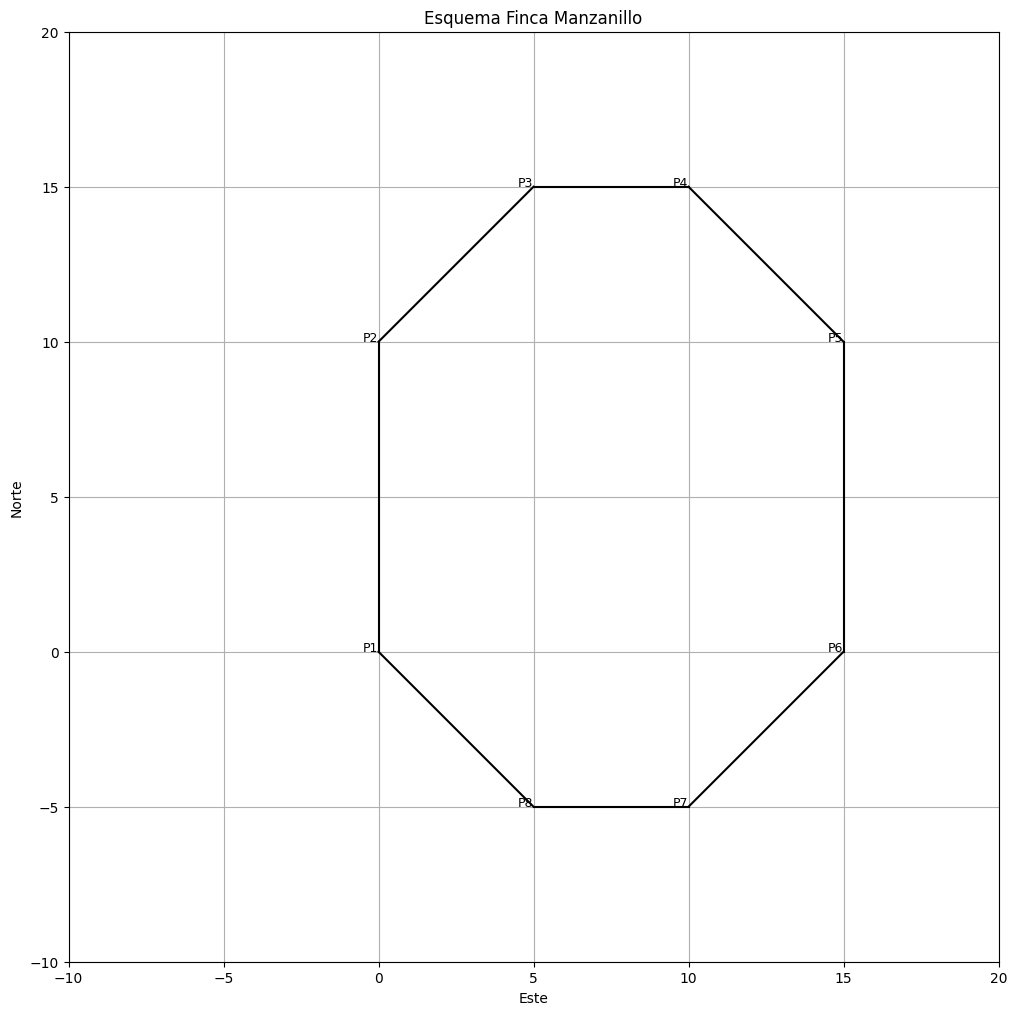

In [31]:


import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 18))

# Coordenadas de ejemplo (debes ajustar según tu imagen)
# Son puntos (x, y) de los vértices
vertices = {
    'P1': (0, 0),
    'P2': (0, 10),
    'P3': (5, 15),
    'P4': (10, 15),
    'P5': (15, 10),
    'P6': (15, 0),
    'P7': (10, -5),
    'P8': (5, -5)
}

# Líneas que unen los vértices
lineas = [
    ('P1', 'P2'),
    ('P2', 'P3'),
    ('P3', 'P4'),
    ('P4', 'P5'),
    ('P5', 'P6'),
    ('P6', 'P7'),
    ('P7', 'P8'),
    ('P8', 'P1')
]

# Dibujar líneas
for inicio, fin in lineas:
    x_vals = [vertices[inicio][0], vertices[fin][0]]
    y_vals = [vertices[inicio][1], vertices[fin][1]]
    ax.plot(x_vals, y_vals, color='black')

# Opcional: agregar nombres de puntos
for nombre, (x, y) in vertices.items():
    ax.text(x, y, nombre, fontsize=9, ha='right')

# Configurar el gráfico
ax.set_title('Esquema Finca Manzanillo')
ax.set_xlabel('Este')
ax.set_ylabel('Norte')
ax.grid(True)
ax.set_aspect('equal')

# Límites aproximados
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)

plt.show()




---

### 📌 ¿Qué te estoy dando aquí?
- **Una malla inicial**: puedes colocar los vértices que aparecen en tu mapa (coordenadas).
- **Conexiones entre puntos**: que forman los límites de cada lote.
- **Nombres sobre el mapa**: como los que ves (por ejemplo "ROT. BUENOS AIRES", "ROT. LA BOCA", etc.).

---
### 🛠️ Para que se parezca aún más:
- Puedes **copiar manualmente las coordenadas** de los vértices que ves en el mapa (porque están en grados UTM).
- Si quieres ser más preciso: podrías usar herramientas tipo QGIS o medir píxeles, pero manualmente también lo puedes hacer para una primera versión sencilla.
- Puedes **añadir subdivisiones** dentro de cada sector (como las líneas internas del mapa).

---
### 🚀 Opcional (más realista):
Si quieres también podemos:
- Simular **todos los lotes** como polígonos (`matplotlib.patches.Polygon`).
- Añadir **colores distintos** a cada zona.
- Dibujar las **líneas radiales** desde los "ROT" hacia los bordes.

---

¿Te gustaría que te avance un ejemplo incluyendo **una subdivisión interna como las del mapa**? (más parecido aún).  
¡Dime y lo hago! 🚀✨

---
¿Quieres que avancemos ahora hacia:
- Crear lotes con `Polygon`
- Añadir las líneas radiales
- Poner nombres como "ROT. PACORA", "ROT. BUENOS AIRES", etc.?
